# Aktivasyon Fonksiyonları

Bir aktivasyon fonksiyonu özünde bir katmanın tüm nöronlarına uygulanan bir fonksiyondur, bu zamana kadar `relu` aktivasyon fonksiyonunu kullandık. Bunun dışında standart olarak kullanılan bazı aktivasyon fonksiyonları vardır ve istediğimiz gibi kendi aktivasyon fonksiyonlarımızı da tanımlayabiliriz. Fakat bir aktivasyon fonksiyonunun sahip olması gereken bazı özellikler vardır, şimdi bunlara değineceğiz. Bu özelliklerden bazıları zorunlu teknik özelliklerdir ve olmazsa olmazdır, bazıları ize sinir ağınin iyi çalışması için gereklidir ve teknik olarak zorunlu değildir.

* Öncelikle tanımlayacağımız aktivasyon fonksiyonu ***sürekli*** bir fonksiyon olmalıdır ve tanım kümesi ***tüm değerleri*** kapsamalıdır. Bazı weight değerleri için bir çıktı üretmeyen bir fonksiyon düşünün, böyle bir fonksiyon aktivasyon fonksiyonu olarak kullanılamaz.



* İyi bir aktivasyon fonksiyonunun ***monoton*** olması gerekir, yani yönünün değişmemesi gerekir. Çünkü monoton olmayan fonksiyonlar farklı input değerleri için aynı output değerini üretebilir. Bunu iki farklı açıdan düşünün; doğru bir weight değerinin birden fazla defa üretilmesi tahmini güçlendirecektir, diğer yandan yanlış weight değerlerinin fazla sayıda olması ise hatayı büyütecektir. Biz burada ikinci bakış açısını daha çok kafaya takmalıyız, dolayısıyla monoton aktivasyon yapmak bizim yararımıza olacaktır.



* İyi aktivasyon fonksiyonları ayrıca ***non-lineer*** olmalıdır, bunu daha önce tartışık. Lineer aktivasyonla gizli katmanda korelasyon elde edemeyiz.


* Son olarak aktivasyon fonksiyonu ve türevi ***kolay hesaplanabilir*** olmalıdır. Bu fonksiyon büyük matrislere defalarca uygulanacak.

Bu derste bu koşullara uyan ve günümüzde sinir ağlarında çok yaygın olarak kullanılan aktivasyon fonksiyonlarını tanıtacağım, siz buradaki koşullara uyan kendi isteğinize göre sonsüz çeşitlilikte aktivasyon fonksiyonu tanımlayabilirsiniz.

Biz buraya kadar sadece gizli katmanda aktivasyon kullandık fakat genelde hem gizli katmanlarda hem son katmanda (output katmanı) aktivasyon yapılır, sadece bunlarda hangi aktivasyon fonksiyonu seçmenin daha uygun olacağına biraz kafa yormamız gerekir. Bu derste bazı örnekler vereceğim.

Şimdi ***gizli katmanlar*** için en uygun aktivasyon fonksiyonlarına değinelim. Son yıllarda bu konuda çok çalışma yapılıyor fakat günümüzde çok yaygın kullandığımız sadece birkaç aktivasyon fonksiyonu var. Bunlardan en yaygınları ***sigmoid*** ve ***tanh*** aktivasyon fonksiypnlarıdır.

***sigmoid*** aktivasyon fonksiyonu bir nöronun değerini `0` ile `1` arası bir değere döünştürür, bir çok durumda nöronların değerini bir olaslık değeri gibi yaptığından bu aktivasyon fonksiyonu hem gizli katmanlarda hem de output katmanlarında kullanılabilir. $$\sigma(x):=\dfrac{1}{1+\rm{e}^{-x}}$$

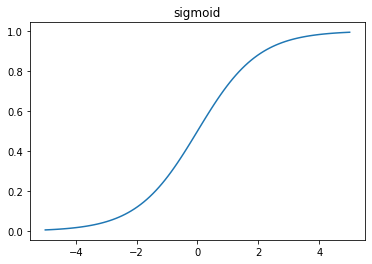

In [1]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.linspace(-5, 5, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.title("sigmoid") 
plt.show() 

Hiperbolik tanjant, ***tanh***, aktivasyon fonksiyonu da sigmoid'e benzer; tek farkı nöronların değerlerini `-1` ile `1` arasına sıkıştırmasıdır. Bundan dolayı gizli katmanlarda sigmoid yerine bunu kullanmak mantıklı olabilir.

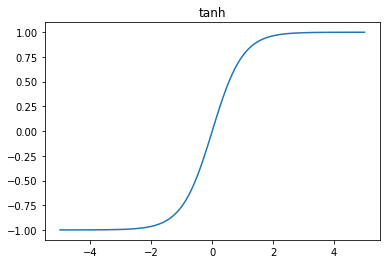

In [2]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.linspace(-5, 5, 100) 
z = np.tanh(x)
  
plt.plot(x, z) 
plt.title("tanh") 
plt.show() 

***Output katmanı*** için en uygun aktivasyon fonksiyonunu seçerken sinir ağının neyi tahmin etmeye çalıştığına dikkat etmeliyiz. Mesela tahminimizde olasılıklar veya evet-hayır (0-1) cevapları değil de ham sayılar üreteceksek output katmanında hiç bir aktivasyon kullanmamak gerekir. Mesela bir bölgenin hava sıcaklığı, bir maçta atılacak gol sayısını veya bir malın fiyatını tahmin etme işi buna bir örnektir; böyle problemlere ***regresyon*** problemleri denir. Böyle sinir ağlarında son katmanda aktivasyon kullanırsak tahminleri ham değerler yerine dönüştürülmüş değerler olarak alırız, bundan dolayı bu tür problemlerde son katman aktivasyonsuz olarak çalıştırılır.

Diğer yandan çoklu output varsa, yani daha önce yaptığımız futbol maçı örneğindeki gibi (galibiyet, kazanç ve mutluluk tahmini) bir model varsa ve bu evet/hayır (1/0) cevapları birbirinden bağımsız ise son katmanda sigmoid aktivasyonu kullanmak daha uygun olacaktır.

Tek outputlu ve çok label içeren (multiclass, MNIST örneğindeki gibi) problemlerde son katmanda ***softmax*** denilen aktivasyon fonksiyonu kullanmak iyi sonuç verir; bu aktivasyon fonksiyonu yüksek olasılıklı tahminlerin değerini yükseltirken diğerlerini de azaltır, böylece doğru tahmini daha belirgin hale getirir. Bu aktivasyon fonksiyonu şöyle çalışır; önce uygulandığı katmanın tüm nöronlarının $x$ değeri için $\exp(x)$ değerlerini hesaplar ve katmanın tüm nöronlarının toplamına böler.

Bazı yaygın aktivasyon fonksiyonlarını öğrendiğimize göre şimdi bunları sinir ağımıza nasıl entegre edeceğimize odaklanalım. Daha önce `relu` aktivasyon fonksiyonunu bir katmana nasıl yüklediysek her aktivasyon fonksiyonu **forward propagation aşamasınd** aynı şekilde yüklenir; katmanın her bir nöronuna bu fonksiyon uygulanır.

```
layer_0 = images[i:i+1]
layer_1 = relu(np.dot(layer_0, weights_0_1)) ###
layer_2 = np.dot(layer_1, weights_1_2)
```

Fakat aktivasyon fonksiyonunun ***back propagation aşamasında*** uygulanmasına biraz kafa yormak gerekiyor. Hatırlarsanız `relu` aktivasyon fonksiyonunda şöyle yapmıştık; bu aktivasyon katmanın bazı nöronlarını sıfır yapıyordu ve dolayısıyla bu nöronların tahmindeki hata üzerinde hiç bir etkisi kalmadığından bunlara ilşikin `delta` değerlerini de sıfır yapmıştık. `delta` değeri bir önceki katmana son hatayı azaltmak için nöron değerlerini nasıl değiştireceğini bildiren bir değerdir, önceki katmanın bazı nöronları son hataya hiç bir katkı sağlamıyorsa bunların değişmemesi gerekir. Şimdi bu tekniği diğer aktivasyon fonksiyonlarına da uygulamamız gerekir, bir aktivasyon fonksiyonu sonrasında oluşan nöron değerlerinin çıktıya katkısı nasıl belirlenir? Bu nöron değerleri çıktıyı ne kadar değiştirebilir?

Aktivasyon fonksiyonunun etki ettiği katman $x$ olsun, mesela `relu(x)` gibi. Bu fonksiyonun katman çıktısında oluşturduğu değişim matematiksel olarak o fonksiyonun ***türevi*** ile ifade edilir, katmandaki küçük bir değişimin çıktıda oluşturacağı değişim

$$\dfrac{\rm{d}}{\rm{dx}}\rm{relu}(x)$$

olur. Sadece `relu` değil, türevlenebilen her fonksiyon için bu böyledir. Dolayısıyla backpropagation aşamasında ilgili katmanın `delta` değerini bu türev ile çarparsak aktivasyon fonksiyonun katmanda oluşturduğu etki ile packpropagation dengesini sağlayabiliriz. Daha önce `relu` ile çalışırken backpropagation aşamasında çarptığımız fonksiyona neden `relu2deriv` dediğimizi şimdi anlamışsınızdır.

Bu bölümde anlattığım aktivasyon fonksiyonları türevleri kolayca hesaplanabilir fonksiyonlardır, aşağıdaki tabloda bu aktivasyon fonksiyonlarının forward ve back propagation aşamalarında nasıl uygulandığı açıklanıyor.

| Aktivasyon Fonksiyonu | Forward Propagation | Backpropagation |
|---|---|---|
| `relu` | `ones_and_zeros = (input > 0)`<br>`output = input*ones_and_zeros` | `mask = (output > 0)`<br>`deriv = output*mask` |
| `sigmoid` | `output = 1/(1 + np.exp(-input)` | `deriv = output*(1 - output)` |
| `tanh` | `output = np.tanh(input)` | `deriv = 1 - output**2` |
| `softmax` | `temp = np.exp(input)`<br>`output /= np.sum(temp)` | `temp = output - truth`<br>`output = temp/len(truth)` |

Şimdi bu öğrendiklerimizi MNIST problemi üzerinde tatbik edelim, bu problemda gizli katman aktivasyonunu olarak `tanh` ve son katman için de `softmax` kullanalım. Bunun için aktivasyon dışında bir kaç basit düzenleme daha yapacağız. Öncelikle `tanh` için weight matrisinin standart sapmasını düşürmeliyiz; daha önce `relu` uygularken `np.random.random` ile 0 ile 1 arasında rastgele sayılardan oluşan başlangıç weight matrisini `0.2` ile çarpıp `0.1` çıkartmış ve böylece weight değerlerini `-0.1` ile `0.1` arasında ölçeklendirmiştik. Bu aralığı `tanh` için daha uygun olan `-0.01` ve `0.01` arasında tutacağız, bunun için çarpma ve çıkarma katsayılarıyla oynayacağız. Ayrıca son katmanda hata hesaplamasını sileceğiz; `softmax` aktivasyonlu katmanlarda hata hesaplaması en iyi şekilde ***cross entropy*** denilen yöntemle yapılır ve bunu daha sonra tartışacağız. Son olarak `alpha` sayısını ayarlayacağız, deneme yoluyla 300 iterasyonda çok daha büyük bir `alpha` katsayısının iyi sonuç verdiğini gözlemledim.

Sonuçlar aşağıda, beklediğimiz kadar test doğruluğu %87 değerine kadar ulaştı!

In [3]:
import sys
import numpy as np
import tensorflow as tf
np.random.seed(1)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
images, labels = (x_train[0:1000].reshape(1000,28*28)/255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels), 10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test), 28*28)/255
test_labels = np.zeros((len(y_test), 10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

tanh = lambda x: np.tanh(x)
tanh2deriv = lambda output: 1 - (output**2)

def softmax(x):
    temp = np.exp(x)
    return temp/np.sum(temp, axis=1, keepdims=True)

alpha, iterations, hidden_size = 2, 300, 100
pixels_per_image, num_labels = 784, 10
batch_size = 100

weights_0_1 = 0.02*np.random.random((pixels_per_image,hidden_size)) - 0.01
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    correct_cnt = 0
    for i in range(int(len(images)/batch_size)):
        batch_start, batch_end=((i*batch_size), ((i+1)*batch_size))
        layer_0 = images[batch_start:batch_end]
        layer_1 = tanh(np.dot(layer_0, weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask*2
        layer_2 = softmax(np.dot(layer_1, weights_1_2))

        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]))

        layer_2_delta = (labels[batch_start:batch_end]-layer_2)/(batch_size*layer_2.shape[0])
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)*tanh2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 += alpha*layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha*layer_0.T.dot(layer_1_delta)

    test_correct_cnt = 0
    for i in range(len(test_images)):
        layer_0 = test_images[i:i+1]
        layer_1 = tanh(np.dot(layer_0, weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)
        test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))
    if(j % 10 == 0):
        sys.stdout.write("\n"+ \
         "I:" + str(j) + \
         " Test-Acc:"+str(test_correct_cnt/float(len(test_images)))+\
         " Train-Acc:" + str(correct_cnt/float(len(images))))


I:0 Test-Acc:0.394 Train-Acc:0.156
I:10 Test-Acc:0.6867 Train-Acc:0.723
I:20 Test-Acc:0.7025 Train-Acc:0.732
I:30 Test-Acc:0.734 Train-Acc:0.763
I:40 Test-Acc:0.7663 Train-Acc:0.794
I:50 Test-Acc:0.7913 Train-Acc:0.819
I:60 Test-Acc:0.8102 Train-Acc:0.849
I:70 Test-Acc:0.8228 Train-Acc:0.864
I:80 Test-Acc:0.831 Train-Acc:0.867
I:90 Test-Acc:0.8364 Train-Acc:0.885
I:100 Test-Acc:0.8407 Train-Acc:0.883
I:110 Test-Acc:0.845 Train-Acc:0.891
I:120 Test-Acc:0.8481 Train-Acc:0.901
I:130 Test-Acc:0.8505 Train-Acc:0.901
I:140 Test-Acc:0.8526 Train-Acc:0.905
I:150 Test-Acc:0.8555 Train-Acc:0.914
I:160 Test-Acc:0.8577 Train-Acc:0.925
I:170 Test-Acc:0.8596 Train-Acc:0.918
I:180 Test-Acc:0.8619 Train-Acc:0.933
I:190 Test-Acc:0.863 Train-Acc:0.933
I:200 Test-Acc:0.8642 Train-Acc:0.926
I:210 Test-Acc:0.8653 Train-Acc:0.931
I:220 Test-Acc:0.8668 Train-Acc:0.93
I:230 Test-Acc:0.8672 Train-Acc:0.937
I:240 Test-Acc:0.8681 Train-Acc:0.938
I:250 Test-Acc:0.8687 Train-Acc:0.937
I:260 Test-Acc:0.8684 Train-